In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.utils import shuffle

In [67]:
filePath = 'wine.data' #getting data path

data = pd.read_csv(filePath, names=["label", 
        "Alcohol", "Malic acid", "Ash", 
	    "Alcalinity of ash", "Magnesium",
	    "Total phenols", "Flavanoids",
 	    "Nonflavanoid phenols", "Proanthocyanins",
	    "Color intensity", "Hue", "OD280/OD315 of diluted wines",
 	    "Proline"]) #read data from pandas
print(data.head(), data.shape)

   label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [68]:
data = shuffle(data) #shuffling data
print(data.head(), data.shape)

     label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
59       2    12.37        0.94  1.36               10.6         88   
128      2    12.37        1.63  2.30               24.5         88   
84       2    11.84        0.89  2.58               18.0         94   
86       2    12.16        1.61  2.31               22.8         90   
129      2    12.04        4.30  2.38               22.0         80   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
59            1.98        0.57                  0.28             0.42   
128           2.22        2.45                  0.40             1.90   
84            2.20        2.21                  0.22             2.35   
86            1.78        1.69                  0.43             1.56   
129           2.10        1.75                  0.42             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
59              1.95  1.05                          1.82      520 

In [69]:
features = data.drop(['label'], axis=1) #getting the training features
labels = data['label'] #getting the training labels
print(labels.head(), features.head())

59     2
128    2
84     2
86     2
129    2
Name: label, dtype: int64      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
59     12.37        0.94  1.36               10.6         88           1.98   
128    12.37        1.63  2.30               24.5         88           2.22   
84     11.84        0.89  2.58               18.0         94           2.20   
86     12.16        1.61  2.31               22.8         90           1.78   
129    12.04        4.30  2.38               22.0         80           2.10   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
59         0.57                  0.28             0.42             1.95  1.05   
128        2.45                  0.40             1.90             2.12  0.89   
84         2.21                  0.22             2.35             3.05  0.79   
86         1.69                  0.43             1.56             2.45  1.33   
129        1.75                  0.42            

In [70]:
encoder = LabelEncoder() #instantiate encoder class to encode labels
lEncoded = encoder.fit_transform(labels) #fitting and transforming data
labelsE = pd.get_dummies(lEncoded).values #encoding labels
print(labelsE[:5], features.head())

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
59     12.37        0.94  1.36               10.6         88           1.98   
128    12.37        1.63  2.30               24.5         88           2.22   
84     11.84        0.89  2.58               18.0         94           2.20   
86     12.16        1.61  2.31               22.8         90           1.78   
129    12.04        4.30  2.38               22.0         80           2.10   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
59         0.57                  0.28             0.42             1.95  1.05   
128        2.45                  0.40             1.90             2.12  0.89   
84         2.21                  0.22             2.35             3.05  0.79   
86         1.69                  0.43             1.56             2.45  1.33   
129        1.75                  0.42             1.35             2.60  0

In [71]:
features = data.drop(['label'], axis=1) #getting the training features
labels = data['label'] #getting the training labels
print(labels.head(), features.head())

59     2
128    2
84     2
86     2
129    2
Name: label, dtype: int64      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
59     12.37        0.94  1.36               10.6         88           1.98   
128    12.37        1.63  2.30               24.5         88           2.22   
84     11.84        0.89  2.58               18.0         94           2.20   
86     12.16        1.61  2.31               22.8         90           1.78   
129    12.04        4.30  2.38               22.0         80           2.10   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
59         0.57                  0.28             0.42             1.95  1.05   
128        2.45                  0.40             1.90             2.12  0.89   
84         2.21                  0.22             2.35             3.05  0.79   
86         1.69                  0.43             1.56             2.45  1.33   
129        1.75                  0.42            

In [72]:
#zscore
features = features.select_dtypes(include='number').apply(zscore)
print(features.head())

      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
59  -0.778980   -1.253450 -3.679162          -2.671018  -0.824415   
128 -0.778980   -0.634063 -0.243142           1.502943  -0.824415   
84  -1.433671   -1.298334  0.780354          -0.448909  -0.403135   
86  -1.038386   -0.652016 -0.206588           0.992459  -0.683988   
129 -1.186618    1.762698  0.049285           0.752231  -1.386122   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
59       -0.504914   -1.465058             -0.659563        -2.051513   
128      -0.120355    0.422399              0.307374         0.541571   
84       -0.152402    0.181447             -1.143031         1.330009   
86       -0.825381   -0.340615              0.549108        -0.054137   
129      -0.312635   -0.280377              0.468530        -0.422075   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
59         -1.344466  0.406051                     -1.118210 -0.722540  


In [73]:
fd = int(.7*len(data)) #Getting first split index point of division 
sd = fd+int(.15*len(data)) #Getting second split index point of division

trainF, validationF, testF = np.split(features, [fd, sd]) #split data in train, test and validation sets
trainLE, validationLE, testLE = np.split(labelsE, [fd, sd]) #split data in train, test and validation sets
print(trainF.shape, validationF.shape, testF.shape)
print(trainLE.shape, validationLE.shape, testLE.shape)
#print(validationLE[:5])

(124, 13) (26, 13) (28, 13)
(124, 3) (26, 3) (28, 3)


In [74]:
model = Sequential() #instantiate the Sequential module to create the model
#model.add(Dense(13, input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
#model.add(Dense(13, kernel_initializer='zeros', input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(13, kernel_initializer='ones', input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(3, activation='softmax')) #adding the output layer
model.compile(Adam(lr=0.2), 'categorical_crossentropy', metrics=['accuracy']) #definning the learning rate
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\guazo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
valSet = (validationF, validationLE)
history = model.fit(trainF, trainLE, epochs=100, validation_data=valSet) #training the model

Epoch 1/100
4/4 [==============================] - 2s 160ms/step - loss: 2.1445 - accuracy: 0.3871 - val_loss: 2.4352 - val_accuracy: 0.7692
Epoch 2/100
4/4 [==============================] - 0s 88ms/step - loss: 1.7659 - accuracy: 0.8548 - val_loss: 1.0138 - val_accuracy: 0.8846
Epoch 3/100
4/4 [==============================] - 0s 48ms/step - loss: 0.7339 - accuracy: 0.9355 - val_loss: 0.3256 - val_accuracy: 0.9615
Epoch 4/100
4/4 [==============================] - 0s 32ms/step - loss: 0.3542 - accuracy: 0.9597 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 0.1230 - accuracy: 0.9839 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 85ms/step - loss: 0.0452 - accuracy: 0.9758 - val_loss: 0.0292 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0511 - accuracy: 0.9758 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 8/100
4/4 [==

In [76]:
labelPred = model.predict(testF)
print(labelPred[:10])

[[7.6709682e-08 4.8382289e-09 9.9999988e-01]
 [3.9514187e-08 4.2972554e-09 1.0000000e+00]
 [2.8931013e-10 7.9374209e-19 1.0000000e+00]
 [2.4161184e-06 9.9999750e-01 7.4072673e-08]
 [6.5443068e-11 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.1353664e-33 4.8147370e-16]
 [9.4118869e-01 5.7333473e-02 1.4777231e-03]
 [6.1970606e-04 9.9917114e-01 2.0920776e-04]
 [6.2089697e-14 5.1294286e-23 1.0000000e+00]
 [2.0641373e-03 9.9728537e-01 6.5055792e-04]]


In [77]:
labelTestClass = np.argmax(testLE, axis=1)
labelPredClass = np.argmax(labelPred, axis=1)
print(labelTestClass)

[2 2 2 1 2 0 1 1 2 1 1 1 1 0 1 0 1 1 2 0 0 2 2 0 0 0 1 0]


In [78]:
report = classification_report(labelTestClass, labelPredClass)
confMatrix = confusion_matrix(labelTestClass, labelPredClass)
print(report)
print(confMatrix)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         8

    accuracy                           0.96        28
   macro avg       0.97      0.97      0.97        28
weighted avg       0.97      0.96      0.96        28

[[ 9  0  0]
 [ 1 10  0]
 [ 0  0  8]]


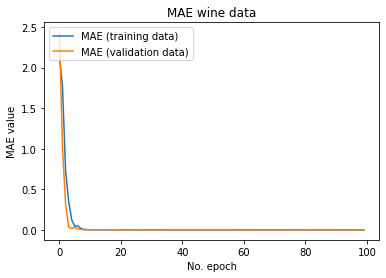

In [80]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE wine data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
#cuentame que mas ha pasado mijo
#aca hablando con mi viejo